# 1- Task 1

### 1.1- Understanding the Datasets provided

In [1]:
import pandas as pd

In [2]:
df_power = pd.read_csv("Actual_power_data.csv")

In [3]:
df_power.head()

,LocalTime,Power(MW)
0,01/01/06 00:00,0.0
1,01/01/06 00:05,0.0
2,01/01/06 00:10,0.0
3,01/01/06 00:15,0.0
4,01/01/06 00:20,0.0


In [4]:
df_power.columns

Index(['LocalTime', 'Power(MW)'], dtype='object')

In [5]:
# Let's find when Power(MW) is different to 0 during the first day [01/01/06]

non_zero_power_indices = df_power.loc[:287, 'Power(MW)'] != 0
indices_non_zero_power = non_zero_power_indices[non_zero_power_indices].index.tolist()

indices_non_zero_power

[98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193]

In [6]:
df_power.iloc[97:195]

,LocalTime,Power(MW)
97,01/01/06 08:05,0.0
98,01/01/06 08:10,0.1
99,01/01/06 08:15,0.5
100,01/01/06 08:20,1.3
101,01/01/06 08:25,2.3
...,...,...
190,01/01/06 15:50,2.1
191,01/01/06 15:55,1.3
192,01/01/06 16:00,0.6
193,01/01/06 16:05,0.2


In [7]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   LocalTime  105120 non-null  object 
 1   Power(MW)  105120 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


In [8]:
df_weather = pd.read_csv("Bronx_Weather_2006.csv")

In [9]:
df_weather.head()

,Date,TempF,TempK,Humidity,HrsDaylight
0,2006-01-01,37.7,276.316667,75.2,9.00
1,2006-01-02,42.2,278.816667,73.7,9.04
2,2006-01-03,37.9,276.427778,85.2,9.08
3,2006-01-04,34.3,274.427778,70.4,9.12
4,2006-01-05,42.5,278.983333,76.5,9.16


In [10]:
df_weather.columns

Index(['Date', 'TempF', 'TempK', 'Humidity', 'HrsDaylight'], dtype='object')

In [11]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   TempF        365 non-null    float64
 2   TempK        365 non-null    float64
 3   Humidity     365 non-null    float64
 4   HrsDaylight  365 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


### 1.2- Data Cleaning

In [12]:
df_power.isna().sum()

LocalTime    0
Power(MW)    0
dtype: int64

In [13]:
df_power.duplicated().sum()

0

In [14]:
df_weather.isna().sum()

Date           0
TempF          0
TempK          0
Humidity       0
HrsDaylight    0
dtype: int64

In [15]:
df_weather.duplicated().sum()

0

### 1.3- Merged DF

In [16]:
# Let's convert dates to datetime type

df_power['Date'] = pd.to_datetime(df_power['LocalTime']).dt.date

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_84701/428463717.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_power['Date'] = pd.to_datetime(df_power['LocalTime']).dt.date


In [17]:
df_power_daily = df_power.groupby('Date', as_index=False).agg({'Power(MW)': 'mean'})

df_power_daily['Date'] = pd.to_datetime(df_power_daily['Date'])
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

df_merged = pd.merge(df_power_daily, df_weather, on='Date', how='inner')

print(df_merged.head())

        Date  Power(MW)  TempF       TempK  Humidity  HrsDaylight
0 2006-01-01   1.567014   37.7  276.316667      75.2         9.00
1 2006-01-02   1.936458   42.2  278.816667      73.7         9.04
2 2006-01-03   0.571875   37.9  276.427778      85.2         9.08
3 2006-01-04   1.970486   34.3  274.427778      70.4         9.12
4 2006-01-05   1.453472   42.5  278.983333      76.5         9.16


In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Power(MW)    365 non-null    float64       
 2   TempF        365 non-null    float64       
 3   TempK        365 non-null    float64       
 4   Humidity     365 non-null    float64       
 5   HrsDaylight  365 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 17.2 KB


### 1.4- ML methods for evaluation of features

In [19]:
X = df_merged.drop(columns=['Date', 'Power(MW)'])
y = df_merged['Power(MW)']

In [20]:
# Lasso machine learning method

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

In [21]:
print(lasso_coefficients)

TempF          0.006946
TempK          0.000000
Humidity      -0.059463
HrsDaylight    0.301656
dtype: float64


Basically, the Lasso model indicate the estimated coefficients for each feature used in the model. 
The coefficients represent the influence each feature has on the target variable. 
HrsDaylight feature has the strongest positive influence with a coefficient of 0.3
However TempK feature has a 0 coefficient meaning it has no influence on the target variable X.

In [22]:
# Random Forest machine learning method

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

In [23]:
print(importances_rf)

TempF          0.065640
TempK          0.062573
Humidity       0.480041
HrsDaylight    0.391746
dtype: float64


A measure of how much each feature contributes to the model’s predictions. Higher values indicate more important features. In the output, Humidity and HrsDaylight are the most important features for this model.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

anova_selector = SelectKBest(f_regression, k='all').fit(X_train, y_train)
anova_scores = anova_selector.scores_

In [25]:
print(anova_scores)

[ 28.47225044  28.47225043 157.30664454 103.91737759]


SelectKBest is used to select the most important features based on their scores computed by the ANOVA F-test. Higher scores indicate that a feature contributes more to the model and is more important. Again: Humidity and HrsDaylight are considered more important for predicting the target variable.

In [26]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA Score': anova_scores,
    'RF Importance': importances_rf,
    'Lasso Coefficients': lasso_coefficients
}).set_index('Feature')

print(feature_importances)

             ANOVA Score  RF Importance  Lasso Coefficients
Feature                                                    
TempF          28.472250       0.065640            0.006946
TempK          28.472250       0.062573            0.000000
Humidity      157.306645       0.480041           -0.059463
HrsDaylight   103.917378       0.391746            0.301656


### 1.5- Decisions on Feature Selection based on previous ML analysis

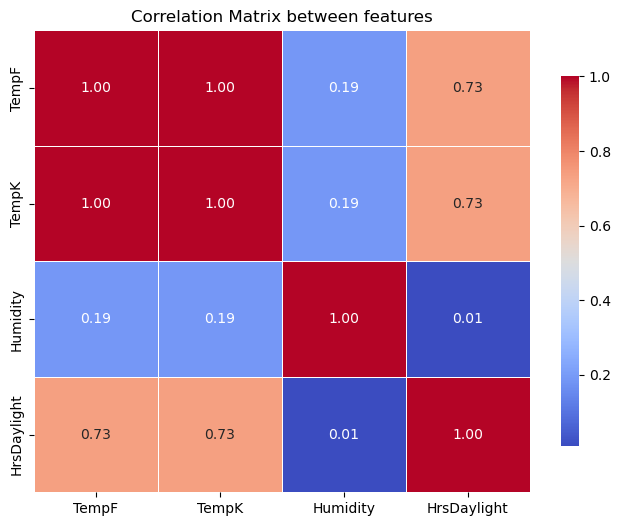

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

X = df_merged.drop(columns=['Date', 'Power(MW)'])

corr_matrix = X.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix between features')
plt.show()

We should drop TempK because it is redudant as we already have TempF. TempK and TempF are likely correlated because they represent the same physical quantity (temperature) in different units. Retaining both would lead to multicollinearity, which can reduce the model's interpretability. 

Let's keep only TempF as it already captures the relationship with the target variable effectively (as seen from the ANOVA score and importance values), so keeping TempK doesn't add new information.

The Lasso has reduced the coefficient of TempK to 0, indicating that it isn't significantly contributing to the model's predictions.
So basically, removing TempK simplifies the model without a significant loss of predictive power.

In [28]:
X = X.drop(columns=['TempK'])

So let's keep:
- TempF: although the key metrics don't indicate a strong influence from this feature, I think it's still too early to reject it from our model, but it's highly likely that this feature will turn out to be irrelevant. 
- Humidity: it has the highest ANOVA score and Random Forest importance. So this feature is clearly influential! Yes the Lasso coefficient is negative but it simply means an inverse relationship with the target variable.
- HrsDaylight: it has a high ANOVA score and Random Forest importance. The Lasso coefficient is positive, maybe meaning a direct relationship with the target.

# 2- Task 2

### 2.1- Exploratory Data Anlysis (EDA)

In [29]:
import numpy as np
import statsmodels.api as sm

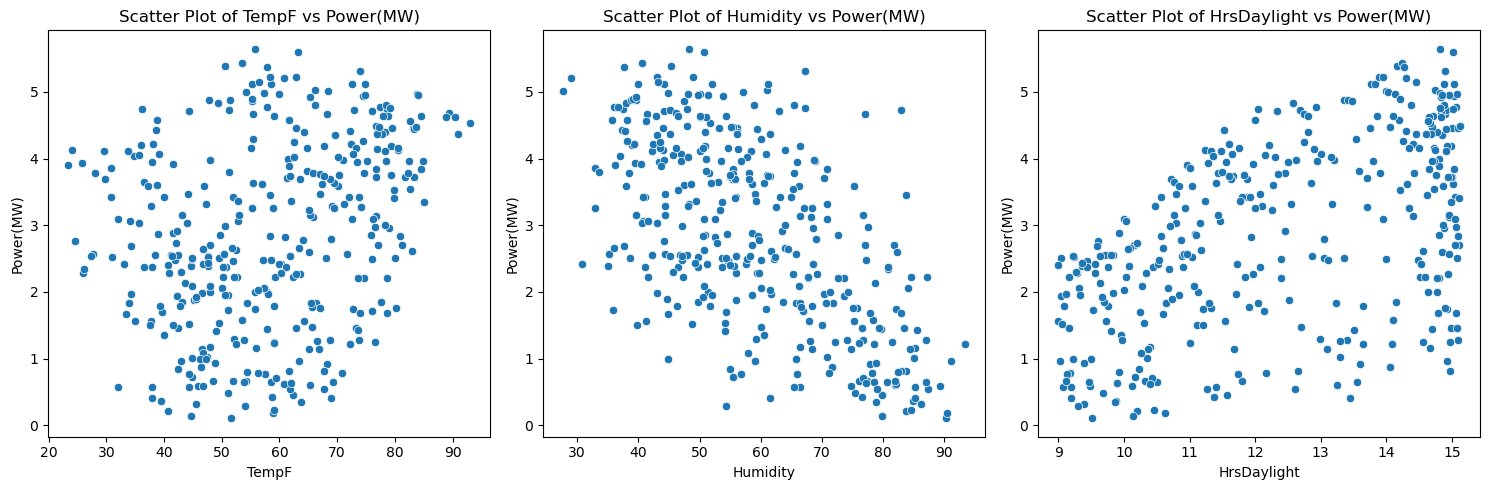

In [30]:
features = ['TempF', 'Humidity', 'HrsDaylight']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_merged, x=feature, y='Power(MW)')
    plt.title(f'Scatter Plot of {feature} vs Power(MW)')

plt.tight_layout()
plt.show()

In [31]:
correlations = df_merged[features].apply(lambda x: x.corr(df_merged['Power(MW)']))

print("Correlation Coefficients:")
print(correlations)

Correlation Coefficients:
TempF          0.280667
Humidity      -0.609592
HrsDaylight    0.518515
dtype: float64


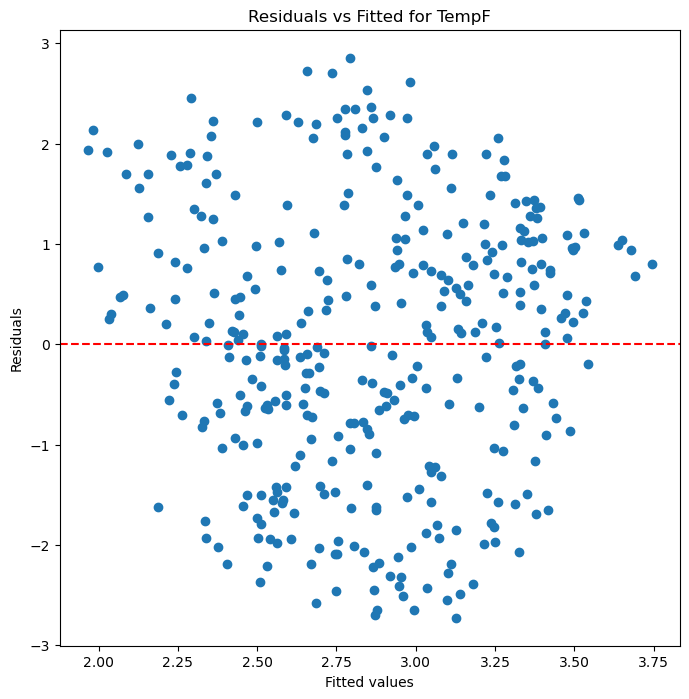

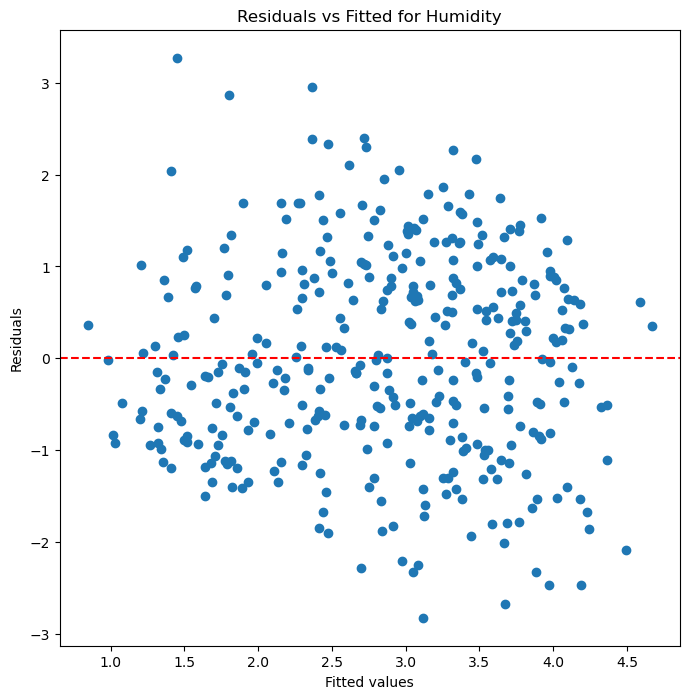

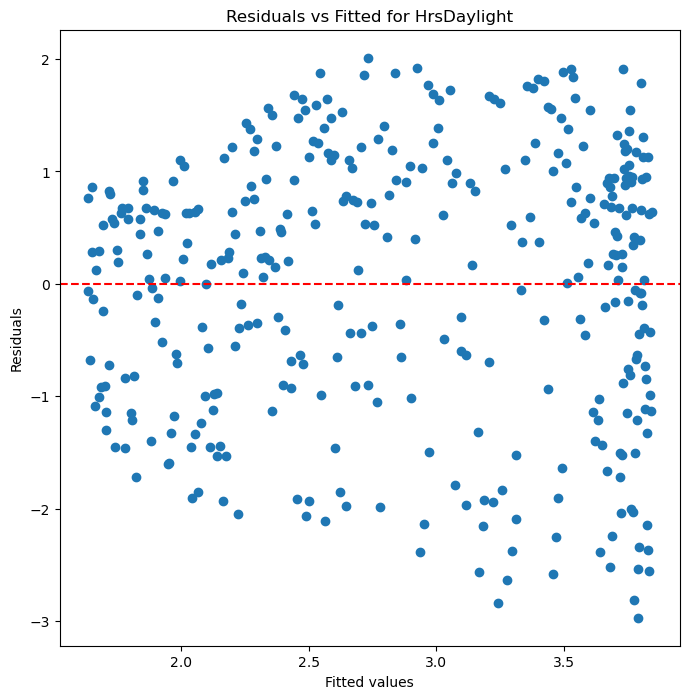

In [32]:
def plot_residuals(feature):
    X = df_merged[[feature]]
    y = df_merged['Power(MW)']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    plt.figure(figsize=(8, 8))
    plt.scatter(model.fittedvalues, model.resid)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals vs Fitted for {feature}')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()

for feature in features:
    plot_residuals(feature)

### 2.2- Test different models

From the previous EDA and the feature selection with ML methods, let's try 4 different ML models for the prediction:

- Random Forest Regressor 
- Gradient Boosting Machine	
- K-Nearest Neighbors (KNN)	
- Linear Regression	

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [34]:
# let's create a df to keep our metrics from the models and compare them very easily!

metrics_df = pd.DataFrame(columns = ['Model', 'Mean Squared Error (MSE)', 'R² Score', 'Mean Absolute Error (MAE)'], 
                         index = ['1', '2', '3', '4'])
metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [35]:
# Random Forest Regressor

X_train, X_test, y_train, y_test = train_test_split(df_merged[['TempF', 'Humidity', 'HrsDaylight']],
                                                    df_merged['Power(MW)'], test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"MSE: {mse}, R2 Score: {r2}, MAE: {mae}")

MSE: 0.8345095759680732, R2 Score: 0.5805365218207585, MAE: 0.725363108828006


In [36]:
metrics_df.loc['1'] = pd.Series({'Model': 'Random Forest Regressor', 'Mean Squared Error (MSE)': 0.83, 'R² Score': 0.58, 
                                 'Mean Absolute Error (MAE)': 0.72})
metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,Random Forest Regressor,0.83,0.58,0.72
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [37]:
# Gradient Boosting Machine

from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

gbm_model.fit(X_train, y_train)

y_pred_gb = gbm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)
mae = mean_absolute_error(y_test, y_pred_gb)

print(f"MSE: {mse}, R2 Score: {r2}, MAE: {mae}")

MSE: 0.789298421868566, R2 Score: 0.6032617588907792, MAE: 0.7054091146089969


In [38]:
metrics_df.loc['2'] = pd.Series({'Model': 'Gradient Boosting Machine', 'Mean Squared Error (MSE)': 0.79, 'R² Score': 0.60, 
                                 'Mean Absolute Error (MAE)': 0.70})
metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,Random Forest Regressor,0.83,0.58,0.72
2,Gradient Boosting Machine,0.79,0.6,0.7
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [39]:
# K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)

print(f"MSE: {mse}, R2 Score: {r2}, MAE: {mae}")

MSE: 0.8546227022291982, R2 Score: 0.5704267254307498, MAE: 0.7460521308980211


In [40]:
metrics_df.loc['3'] = pd.Series({'Model': 'K-Nearest Neighbors (KNN)', 'Mean Squared Error (MSE)': 0.85, 'R² Score': 0.57, 
                                 'Mean Absolute Error (MAE)': 0.75})
metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,Random Forest Regressor,0.83,0.58,0.72
2,Gradient Boosting Machine,0.79,0.6,0.7
3,K-Nearest Neighbors (KNN),0.85,0.57,0.75
4,NaN,NaN,NaN,NaN


In [41]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)

print(f"MSE: {mse}, R2 Score: {r2}, MAE: {mae}")

MSE: 0.6955301422197582, R2 Score: 0.6503940745130957, MAE: 0.6973554807406088


In [42]:
metrics_df.loc['4'] = pd.Series({'Model': 'Linear Regression', 'Mean Squared Error (MSE)': 0.70, 'R² Score': 0.65, 
                                 'Mean Absolute Error (MAE)': 0.70})
metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,Random Forest Regressor,0.83,0.58,0.72
2,Gradient Boosting Machine,0.79,0.6,0.7
3,K-Nearest Neighbors (KNN),0.85,0.57,0.75
4,Linear Regression,0.7,0.65,0.7


In [43]:
metrics_df.head(4)

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,Random Forest Regressor,0.83,0.58,0.72
2,Gradient Boosting Machine,0.79,0.6,0.7
3,K-Nearest Neighbors (KNN),0.85,0.57,0.75
4,Linear Regression,0.7,0.65,0.7


### 2.3- Feature Re-evaluation

I think we need to drop the TempF feature because it has a negative impact on our results. We're going to try to re-build our models without this feature and see if it's better. Then we can move on to choosing our final model and trying to improve it through different tunnings.

### 2.4- Re-test different models

In [44]:
# let's create another df to keep our metrics from the new models and compare them very easily!

new_metrics_df = pd.DataFrame(columns = ['Model', 'Mean Squared Error (MSE)', 'R² Score', 'Mean Absolute Error (MAE)'], 
                         index = ['1', '2', '3', '4'])
new_metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [45]:
# New Random Forest Regressor

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(df_merged[['Humidity', 'HrsDaylight']],
                                                    df_merged['Power(MW)'], test_size=0.2, random_state=42)

new_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

new_rf_model.fit(new_X_train, new_y_train)

new_y_pred_rf = new_rf_model.predict(new_X_test)

mse = mean_squared_error(new_y_test, new_y_pred_rf)
r2 = r2_score(new_y_test, new_y_pred_rf)
mae = mean_absolute_error(new_y_test, new_y_pred_rf)

print(f"MSE: {mse}, R2 Score: {r2}, MAE: {mae}")

MSE: 0.7654518144813661, R2 Score: 0.6152481772201386, MAE: 0.7261015506088281


In [46]:
new_metrics_df.loc['1'] = pd.Series({'Model': 'New Random Forest Regressor', 'Mean Squared Error (MSE)': 0.76, 'R² Score': 0.61, 
                                 'Mean Absolute Error (MAE)': 0.73})
new_metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,New Random Forest Regressor,0.76,0.61,0.73
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [47]:
# New Gradient Boosting Machine

from sklearn.ensemble import GradientBoostingRegressor

new_gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

new_gbm_model.fit(new_X_train, new_y_train)

new_y_pred_gb = new_gbm_model.predict(new_X_test)

mse = mean_squared_error(new_y_test, new_y_pred_gb)
r2 = r2_score(new_y_test, new_y_pred_gb)
mae = mean_absolute_error(new_y_test, new_y_pred_gb)

print(f"MSE: {mse}, R2 Score: {r2}, MAE: {mae}")

MSE: 0.689562412933083, R2 Score: 0.6533937339004874, MAE: 0.6710921432907797


In [48]:
new_metrics_df.loc['2'] = pd.Series({'Model': 'New Gradient Boosting Machine', 'Mean Squared Error (MSE)': 0.69, 'R² Score': 0.65, 
                                 'Mean Absolute Error (MAE)': 0.67})
new_metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,New Random Forest Regressor,0.76,0.61,0.73
2,New Gradient Boosting Machine,0.69,0.65,0.67
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [49]:
# New K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsRegressor

new_knn = KNeighborsRegressor(n_neighbors=5)
new_knn.fit(new_X_train, new_y_train)

new_y_pred_knn = new_knn.predict(new_X_test)

mse = mean_squared_error(new_y_test, new_y_pred_knn)
r2 = r2_score(new_y_test, new_y_pred_knn)
mae = mean_absolute_error(new_y_test, new_y_pred_knn)

print(f"MSE: {mse}, R2 Score: {r2}, MAE: {mae}")

MSE: 0.737712790673093, R2 Score: 0.6291911057891935, MAE: 0.6865924657534246


In [50]:
new_metrics_df.loc['3'] = pd.Series({'Model': 'New K-Nearest Neighbors (KNN)', 'Mean Squared Error (MSE)': 0.74, 'R² Score': 0.63, 
                                 'Mean Absolute Error (MAE)': 0.69})
new_metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,New Random Forest Regressor,0.76,0.61,0.73
2,New Gradient Boosting Machine,0.69,0.65,0.67
3,New K-Nearest Neighbors (KNN),0.74,0.63,0.69
4,NaN,NaN,NaN,NaN


In [51]:
# New Linear Regression

from sklearn.linear_model import LinearRegression

new_lin_reg = LinearRegression()
new_lin_reg.fit(new_X_train, new_y_train)

new_y_pred_lr = new_lin_reg.predict(new_X_test)

mse = mean_squared_error(new_y_test, new_y_pred_lr)
r2 = r2_score(new_y_test, new_y_pred_lr)
mae = mean_absolute_error(new_y_test, new_y_pred_lr)

print(f"MSE: {mse}, R2 Score: {r2}, MAE: {mae}")

MSE: 0.6789062159720958, R2 Score: 0.6587500360570366, MAE: 0.6877455836611934


In [52]:
new_metrics_df.loc['4'] = pd.Series({'Model': 'New Linear Regression', 'Mean Squared Error (MSE)': 0.68, 'R² Score': 0.66, 
                                 'Mean Absolute Error (MAE)': 0.69})
new_metrics_df.head()

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,New Random Forest Regressor,0.76,0.61,0.73
2,New Gradient Boosting Machine,0.69,0.65,0.67
3,New K-Nearest Neighbors (KNN),0.74,0.63,0.69
4,New Linear Regression,0.68,0.66,0.69


### 2.5- Choosing my final model based on key metrics

In [53]:
metrics_df.head(4)

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,Random Forest Regressor,0.83,0.58,0.72
2,Gradient Boosting Machine,0.79,0.6,0.7
3,K-Nearest Neighbors (KNN),0.85,0.57,0.75
4,Linear Regression,0.7,0.65,0.7


In [54]:
new_metrics_df.head(4)

,Model,Mean Squared Error (MSE),R² Score,Mean Absolute Error (MAE)
1,New Random Forest Regressor,0.76,0.61,0.73
2,New Gradient Boosting Machine,0.69,0.65,0.67
3,New K-Nearest Neighbors (KNN),0.74,0.63,0.69
4,New Linear Regression,0.68,0.66,0.69


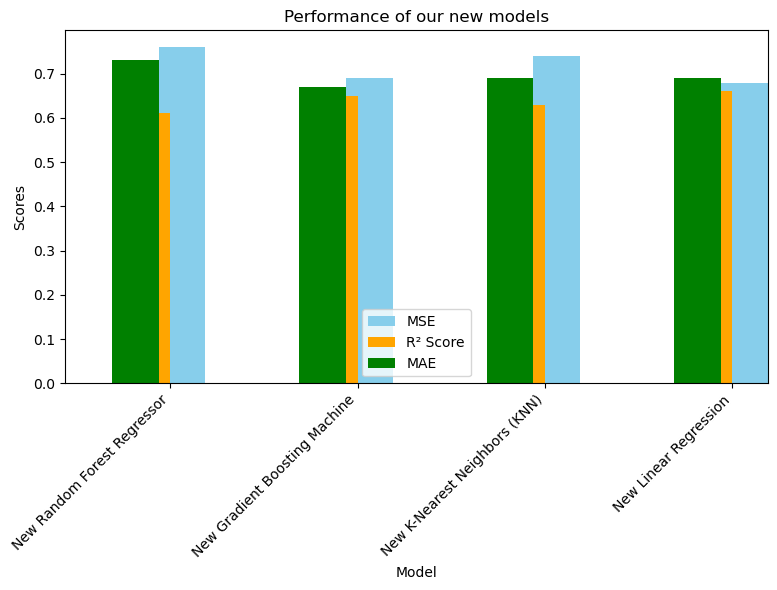

In [55]:
data = {
    'Model': ['New Random Forest Regressor', 'New Gradient Boosting Machine', 'New K-Nearest Neighbors (KNN)', 'New Linear Regression'],
    'MSE': [0.76, 0.69, 0.74, 0.68],
    'R2 Score': [0.61, 0.65, 0.63, 0.66],
    'MAE': [0.73, 0.67, 0.69, 0.69]
}

df_vizu = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(8, 6))

df_vizu.plot(x='Model', y='MSE', kind='bar', ax=ax, color='skyblue', label='MSE', width=0.25, position=0.25)
df_vizu.plot(x='Model', y='R2 Score', kind='bar', ax=ax, color='orange', label='R² Score', width=0.25, position=1)
df_vizu.plot(x='Model', y='MAE', kind='bar', ax=ax, color='green', label='MAE', width=0.25, position=1.25)

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Performance of our new models')
ax.legend(loc='best')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As a reminder, we want an MSE close to 0, an R² close to 1 and a MAE close to 0.
So yes, it was indeed a good decision to drop TempF feature as you can see: all the MSE (without exception) have decreased, all the R² score have increased and most of the MAE have decreased.

Based on the metrics, the New Linear Regression is the best model. It has:

* The lowest MSE -> indicating minimal large errors
* The highest R² Score -> showing it explains the most variance
* A competitive MAE comparing to other models

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(new_lin_reg, new_X_train, new_y_train, scoring='neg_mean_squared_error', cv=5)
mean_score = -scores.mean()
print(mean_score)

0.7108926955285039


The mean score of 0.71 from cross-validation indicates the average negative MSE for our final model across 5 folds. 

This value suggests that (on average) the model's predictions are off by a MSE of approximately 0.71 which is relatively high. While not ideal, this score shows that the model's performance is reasonably stable and not overly prone to overfitting. 

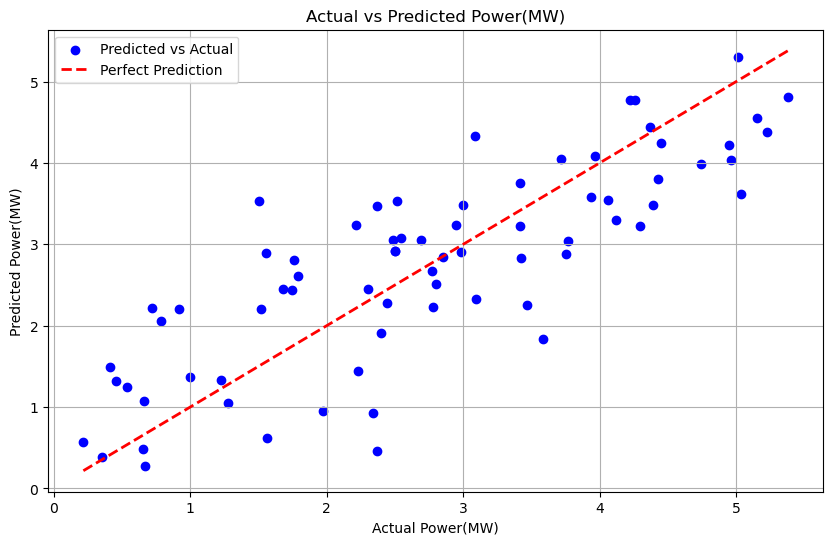

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, new_y_pred_lr, color='blue', label='Predicted vs Actual')

plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Power(MW)')
plt.xlabel('Actual Power(MW)')
plt.ylabel('Predicted Power(MW)')
plt.legend()
plt.grid(True)
plt.show()

To sum up, our best model so far to predict our target variable (power output) is a machine learning linear regression model that used only 2 features (hours of sunlight and humidity)

### 2.6 Next Steps!

To improve our predictive model, we will need to consider tuning the model's hyperparameters!